 #### Load the data

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from utils import (load_data, 
                   extract_features, 
                   build_time_features, 
                   build_prev_city, 
                   build_first_city, 
                   split_features_label, 
                   flatten_features, 
                   LabelEncoderMapping)
from config import train_path, test_path
df_train = load_data(train_path, min_trip_length_threshold=4)
df_test = load_data(test_path, min_trip_length_threshold=4)
data = pd.concat([df_train, df_test], sort=False)

df = data.copy()

In [3]:
df = extract_features(df)
df.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,device_class_encode,...,checkout_year,checkout_month,checkout_woy,checkout_dow,checkout_weekend,length,trip_length,season,count,first_city
0,29.0,2016-07-09,2016-07-11,27863,desktop,1601.0,Elbonia,Elbonia,29_1,0,...,2016,7,28,0,0,0.693147,4,2,0,27863
1,29.0,2016-07-11,2016-07-13,20362,desktop,1601.0,Elbonia,Elbonia,29_1,0,...,2016,7,28,2,0,0.693147,4,2,1,27863
2,29.0,2016-07-13,2016-07-16,7324,desktop,1601.0,Elbonia,Elbonia,29_1,0,...,2016,7,28,5,1,1.098612,4,2,2,27863
3,29.0,2016-07-16,2016-07-18,9666,desktop,8132.0,Elbonia,Elbonia,29_1,0,...,2016,7,29,0,0,0.693147,4,2,3,27863
4,81.0,2016-05-15,2016-05-16,19903,desktop,9924.0,Elbonia,Elbonia,81_1,0,...,2016,5,20,0,0,0.000000,4,1,0,19903


In [4]:
features, labels = split_features_label(df)

In [5]:
features.head()

,user_id,city_id,affiliate_id,utrip_id,device_class_encode,booker_country_encode,hotel_country_encode,checkin_year,checkin_month,checkin_woy,...,checkout_year,checkout_month,checkout_woy,checkout_dow,checkout_weekend,length,trip_length,season,count,first_city
186676,1000027.0,4876,7168.0,1000027_1,0,1,60,2016,8,32,...,2016,8,32,6,1,0.000000,4,2,0,4876
186678,1000027.0,35993,7168.0,1000027_1,0,1,60,2016,8,33,...,2016,8,33,3,0,0.693147,4,2,2,4876
186677,1000027.0,9205,7168.0,1000027_1,0,1,60,2016,8,32,...,2016,8,33,1,0,0.693147,4,2,1,4876
186682,1000033.0,12592,384.0,1000033_1,0,2,36,2016,4,15,...,2016,4,15,3,0,0.693147,5,1,2,22861
186683,1000033.0,16275,384.0,1000033_1,0,2,36,2016,4,15,...,2016,4,15,5,1,0.693147,5,1,3,22861


In [6]:
labels.head()

,utrip_id,city_id
186679,1000027_1,18081
186684,1000033_1,22861
186691,1000045_1,21308
1225473,1000066_2,0
186695,1000083_1,21308


In [7]:
features = flatten_features(features)
features.head()

,utrip_id,user_id,affiliate_id_1,booker_country_encode_1,checkin_dow_1,checkin_month_1,checkin_weekend_1,checkin_woy_1,checkin_year_1,checkout_dow_1,...,checkout_woy_47,checkout_year_47,city_id_47,count_47,device_class_encode_47,first_city_47,hotel_country_encode_47,length_47,season_47,trip_length_47
0,1000027_1,1000027.0,7168.0,1.0,5.0,8.0,1.0,32.0,2016.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000033_1,1000033.0,384.0,2.0,1.0,4.0,0.0,15.0,2016.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000045_1,1000045.0,359.0,4.0,5.0,6.0,1.0,25.0,2016.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000066_2,1000066.0,9924.0,2.0,0.0,7.0,0.0,30.0,2016.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000083_1,1000083.0,359.0,4.0,0.0,6.0,0.0,24.0,2016.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
import tensorflow as tf
dict_slices = tf.data.Dataset.from_tensor_slices((features.loc[:, features.columns != 'utrip_id'].to_dict('list'), labels.loc[:, 'city_id'].values)).batch(16)

#### EDA

Text(0.5, 0, 'Freqyency city_id')

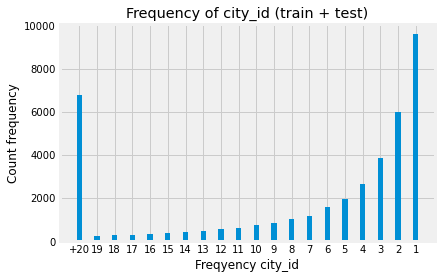

In [24]:
counter = Counter([x if x < 20 else 20 for x in df.city_id.value_counts()])
N = len(counter)
ind = np.arange(N)
frequencies = counter.values()
names = counter.keys()
plt.bar(ind, frequencies, label=names, tick_label=['+20'if x == 20 else str(x) for x in names], width=0.3)
plt.grid(True)
plt.title('Frequency of city_id (train + test)')
plt.ylabel('Count frequency')
plt.xlabel('Freqyency city_id')

In [11]:
df.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,checkin_year,...,checkout_woy,checkout_dow,checkout_weekend,length,trip_length,season,prev_1,prev_2,prev_3,prev_4
0,29,2016-07-09,2016-07-11,47054,desktop,1601,Elbonia,Elbonia,29_1,2016,...,28,0,0,0.693147,4,2,0,0,0,0
1,29,2016-07-11,2016-07-13,34444,desktop,1601,Elbonia,Elbonia,29_1,2016,...,28,2,0,0.693147,4,2,0,0,0,0
2,29,2016-07-13,2016-07-16,12291,desktop,1601,Elbonia,Elbonia,29_1,2016,...,28,5,1,1.098612,4,2,0,0,0,0
3,29,2016-07-16,2016-07-18,16386,desktop,8132,Elbonia,Elbonia,29_1,2016,...,29,0,0,0.693147,4,2,0,0,0,0
4,81,2016-05-15,2016-05-16,33665,desktop,9924,Elbonia,Elbonia,81_1,2016,...,20,0,0,0.000000,4,1,0,0,0,0
